In [132]:
import json
## For data handling
import pandas as pd
import numpy as np
import statistics

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
import seaborn as sns

## For refining texts
import unidecode
import string

## This sets the plot style
## to have a grid on a dark background
set_style("whitegrid")

In [2]:
# Opening JSON file
f = open('data/train.json')

# parse x:
y = json.load(f)

### Data Example

The following shows an example each point of the data sets consisting of a list of ingredients labeled with a cuisine. 

In [3]:
y[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

The first recipe with 'id = 10259' is a greek cuisine made of 9 ingredients.

### How many data points in the training set?

We convert the training set into a pandas data frame.

In [4]:
df = pd.DataFrame(y)
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In the training set, we have 39774 rows. Looking at df.info(), we found that there is no missing point in the given data.

### Recipe-counts by cuisine

In [6]:
print("There are " + str(df['cuisine'].nunique()) + " cuisines." )
print("They are " + ', '.join(df['cuisine'].unique()) + ".")

There are 20 cuisines.
They are greek, southern_us, filipino, indian, jamaican, spanish, italian, mexican, chinese, british, thai, vietnamese, cajun_creole, brazilian, french, japanese, irish, korean, moroccan, russian.


The following counts the number of recipes for each cuisine.

In [14]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [11]:
df['cuisine'].value_counts()/39774

italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64

The distribution of the recipes by cuisine is skewed. 'italian' takes for 20%(the maximum), mexican is followed by 16%, and brazilian is 1%(the minimum). We see the proportion of the cuisines in the training set.

array([<AxesSubplot:ylabel='cuisine'>], dtype=object)

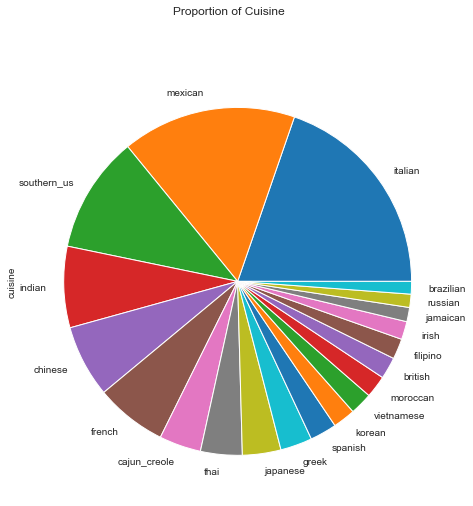

In [16]:
df['cuisine'].value_counts().plot(kind = 'pie', figsize=(10,8),subplots=True,title = 'Proportion of Cuisine', legend = False)

### Ingredients

Next, we look at the training set filtered by ingredients. We make a list of ingredients that show up in the data frame. This includes duplication.

In [17]:
ingredients_list = [item for sublist in df.ingredients for item in sublist]

We want to minimize the duplication in the ingredietns_list by making each ingredient to lower case and by reducing empty spaces. We call the function 'refine_texts'. 

In [19]:
def refine_texts(text):
    text = unidecode.unidecode(text) # Removes Accent from the name
    text = text.lower() # Convert's everything to lowercase
    #text = text.replace(',','')
    for s in text:
        if s not in string.ascii_lowercase:
            text = text.replace(s,' ')
        else:
            continue
    return text.strip()

In [ ]:
refined_ingredients = []
for item in ingredients_list:
    refined_ingredients.append(refine_texts(item))

We count the total number of ingredients in the training set without duplication. 

In [28]:
print(" There are " + str(len(set(refined_ingredients))) + " unique ingredients.")

 There are 6690 unique ingredients.


In [29]:
print("Summary: " +  str(len(df)) + " recipes, " + str(df['cuisine'].nunique()) + " cuisines, " + str(len(set(refined_ingredients))) + " ingredients.")

Summary: 39774 recipes, 20 cuisines, 6690 ingredients.


Since 'list' is unhashable, we convert the lists of ingredients into tuples of ingredients. Moreover, we count the number of ingredients needed for each recipe.

In [26]:
new_col = []
ingredients_count = []
for ingredients in df['ingredients']:
    new_list = []
    for item in ingredients:
        new_list.append(refine_texts(item))
    new_col.append(tuple(new_list))
    ingredients_count.append(len(ingredients))

In [27]:
df['refined_ingredients'] = pd.Series(new_col)
df['ingredients_count'] = pd.Series(ingredients_count)

In [31]:
df.describe()

,id,ingredients_count
count,39774.000000,39774.000000
mean,24849.536959,10.767713
std,14360.035505,4.428978
min,0.000000,1.000000
25%,12398.250000,8.000000
50%,24887.000000,10.000000
75%,37328.500000,13.000000
max,49717.000000,65.000000


In [35]:
print("On average, each row (=a recipe) consists of " + str(df.ingredients_count.mean()) + " of ingredients.")
print("The minimum number of ingredients is " + str(min(df.ingredients_count)) + " and the maximum is " + str(max(df.ingredients_count)) + ".")

On average, each row (=a recipe) consists of 10.76771257605471 of ingredients.
The minimum number of ingredients is 1 and the maximum is 65.


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ingredients_count', ylabel='Density'>

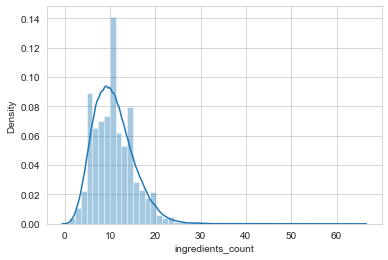

In [36]:
sns.distplot(df['ingredients_count'])

By looking at the density against the ingredients_count, most of the recipes consist of about 10 ingredients. Only a few recipes have more than 30 ingredients.

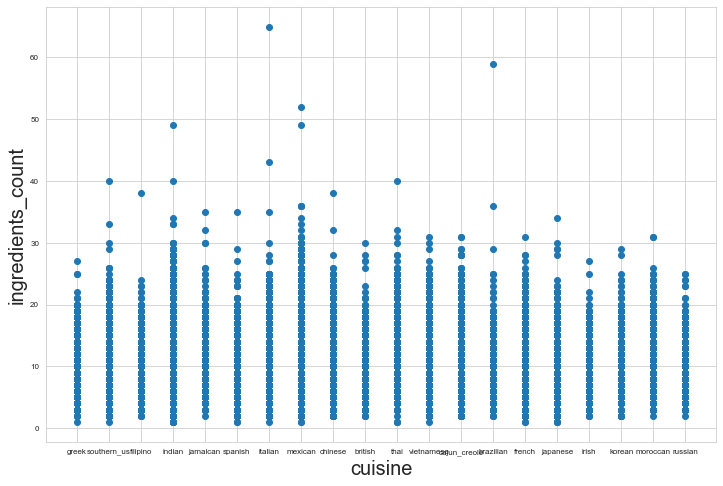

In [40]:
plt.figure(figsize=(12,8))

plt.scatter(df.cuisine,
               df.ingredients_count)


plt.xlabel("cuisine", fontsize=20)
plt.ylabel("ingredients_count", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Most of cuisines have recipes with more than 30 ingredients except 'greek', 'irish', 'korean', and 'russian'.

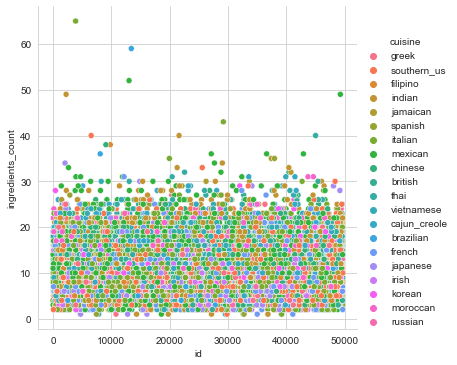

In [38]:
sns.relplot(x='id', y='ingredients_count', hue='cuisine', data=df)

We don't see any significant cluster in the chart above "recipes by ingredients_count". The distribution of the number of ingredietns used by cuisine looks similar.

### Is there duplication in the training set?

It looks like there are some recipes with the same set of ingredients. For example, "cold water, lime, sugar, sweetened condensed milk" appears 3 times in the training set.

In [42]:
print("There are " + str(len(df[df.duplicated(['refined_ingredients'])])) + " rows with the combination of the ingredients shows up more than once.")

There are 100 rows with the combination of the ingredients shows up more than once.


In [47]:
print(str(len(df[df.duplicated(['cuisine','refined_ingredients'])])) + " of them coincide with cuisine. In other words, for these rows, if two sets of ingredients are the same, then the cuisine labels of them are the same as well.")

97 of them coincide with cuisine. In other words, for these rows, if two sets of ingredients are the same, then the cuisine labels of them are the same as well.


This implies that there are 3 pairs of rows with the same set of ingredients but labeled by different cuisines. They are the following.

In [52]:
set(df[df.duplicated(['refined_ingredients'])].iloc[:,0]) - set(df[df.duplicated(['cuisine','refined_ingredients'])].iloc[:,0])

{41135, 42055, 43476}

In [63]:
df.loc[(df.id == 41135) | (df.id == 42055) | (df.id ==  43476)]

,id,cuisine,ingredients,refined_ingredients,ingredients_count
22119,41135,french,[butter],"(butter,)",1
25411,42055,mexican,"[buttermilk, whipping cream]","(buttermilk, whipping cream)",2
34313,43476,mexican,"[water, fresh lime juice, boneless pork should...","(water, fresh lime juice, boneless pork should...",10


In [69]:
df.loc[df.refined_ingredients == ('butter',)]

,id,cuisine,ingredients,refined_ingredients,ingredients_count
8990,41124,indian,[butter],"(butter,)",1
22119,41135,french,[butter],"(butter,)",1


In [67]:
df.loc[df.refined_ingredients == ('buttermilk', 'whipping cream')]

,id,cuisine,ingredients,refined_ingredients,ingredients_count
20472,21949,french,"[buttermilk, whipping cream]","(buttermilk, whipping cream)",2
25411,42055,mexican,"[buttermilk, whipping cream]","(buttermilk, whipping cream)",2


In [72]:
df.loc[df.refined_ingredients == ('water','fresh lime juice','boneless pork shoulder','ground black pepper','dried oregano','orange','onions','kosher salt','bay leaves','ground cumin')]

,id,cuisine,ingredients,refined_ingredients,ingredients_count
20880,9397,spanish,"[water, fresh lime juice, boneless pork should...","(water, fresh lime juice, boneless pork should...",10
34313,43476,mexican,"[water, fresh lime juice, boneless pork should...","(water, fresh lime juice, boneless pork should...",10


### Filtration by frequent or rare ingredients for each cuisine.

We create dummy variables by cuisine.

In [73]:
cuisine = pd.get_dummies(df, columns = ['cuisine'])

For each ingredient, we want to count the number of recipes for each cuisine. Since there are 20 cuisines, we store this information in a 20-dimensional vector $x = (x_0, \dots, x_{19})$. $x_i$ denotes the number of occurence of the given ingredients in i-th cuisine. We call a function from the rows in the training set to $\mathbb{R}^{20}$ 'cuisine_vetor' as follows.

In [74]:
def cuisine_vector(row):
    v = []
    for i in range(20):
        v.append(cuisine.iloc[row][int(4+i)])
    return v    

Then, we create a dictionary which match each ingredient with cuisine_vector.

In [75]:
# For an ingredient, if it shows up in a cuisine, say 'italian', 
# then we store them in a dictionary with 
# key-the ingredient & value- 'italian'

ingredient_cuisine = {}
for i in df.index:
    for ingredient in df['refined_ingredients'][i]:
        if ingredient not in ingredient_cuisine:
            ingredient_cuisine[ingredient] = tuple(cuisine_vector(i))
        else:
            ingredient_cuisine[ingredient] = tuple(np.array(ingredient_cuisine[ingredient]) + np.array(cuisine_vector(i)))    

For example, 'black olives' appears 0 times in brazilian cuisine(=0th cuisine) and it appears 21 times in french cuisine(=5th cuisine).

In [76]:
ingredient_cuisine['black olives']

(0, 0, 2, 0, 0, 21, 31, 0, 0, 67, 0, 0, 0, 92, 8, 1, 3, 4, 0, 0)

Using this dictionary, ingredient_cuisine, we divide the set of ingredients into 20 subsets, which are from the ingredients that appears for a single cuisine to the ingredients that appears for all cuisines.

In [79]:
cuisine_frequency_level = np.zeros(20)
for i in range(1,20):
    count = 0
    for key, val in ingredient_cuisine.items():
        if 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 20-i:
            count += 1
    cuisine_frequency_level[i-1] = count

In [89]:
# allcount = 0
# for key, val in ingredient_cuisine.items():
#     if sum(val) == 1:
#         allcount += 1
# cuisine_frequency_level[19] = allcount        

In [97]:
cuisine_frequency_level[19]=104

'cuisine_frequency_leve' is an array explaining 2587 ingredients show up in a single cuisine, 1001 ingredeints show up only in two cuisines, ..., 104 of them show up for all cuisines.

In [102]:
print("There are " + str(104) + " ingredients that are used only once in the total of recipes in the training set.")
print("For example, 'white almond bark', 'chestnut flour', or 'taiwanese bok choy'.")

There are 104 ingredients that are used only once in the total of recipes in the training set.
For example, 'white almond bark', 'chestnut flour', or 'taiwanese bok choy'.


We print a special type of ingredients which appear only for a single cuisine.

In [ ]:
# low_frequency_ingredients = []
# single_cuisine_ingredients = []
# all_cuisine_ingredients=[]
# two_cuisine_ingredients = []
# three_cuisine_ingredients = []

# for key, val in ingredient_cuisine.items():
#     if sum(val) == 1:
#         low_frequency_ingredients.append(key)
#     if 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 19:
#         single_cuisine_ingredients.append(key)
#     elif 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 18:
#         two_cuisine_ingredients.append(key)
#     elif 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 17:
#         three_cuisine_ingredients.append(key)
#     elif 0 not in pd.Series(val).value_counts():
#         all_cuisine_ingredients.append(key)
        

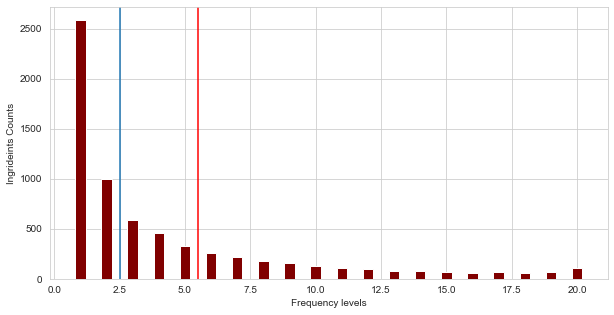

In [160]:
fig = plt.figure(figsize = (10, 5))

level = list(np.arange(1,21)) 
counts = list(cuisine_frequency_level)

plt.bar(level, counts, color ='maroon',
        width = 0.4)
plt.xlabel('Frequency levels')
plt.ylabel('Ingrideints Counts')
plt.axvline(x = 2.5)
plt.axvline(x = 5.5, color = 'r')

plt.show()

In [148]:
len(ingredient_cuisine)/2 < sum(cuisine_frequency_level[:2])

True

In [159]:
sum(cuisine_frequency_level[:5])/len(ingredient_cuisine)

0.74050822122571

The sum of ingredients of level 1 and level 2 is more than 50%, the sum

### Top 10 Ingredients per Cuisine

In [154]:
cuisine_label = df["cuisine"].unique()

cus = dict()
for label in cuisine_label:
    list_ingredients = []
    for tuple in df[df['cuisine']==label]['refined_ingredients']:
        for item in tuple:
            list_ingredients.append(item)
    cus[label] = i

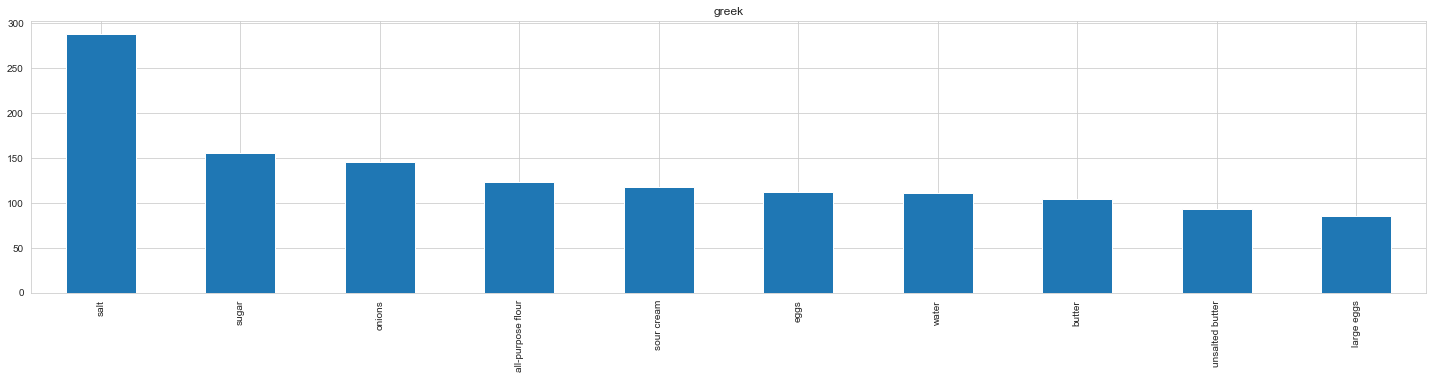

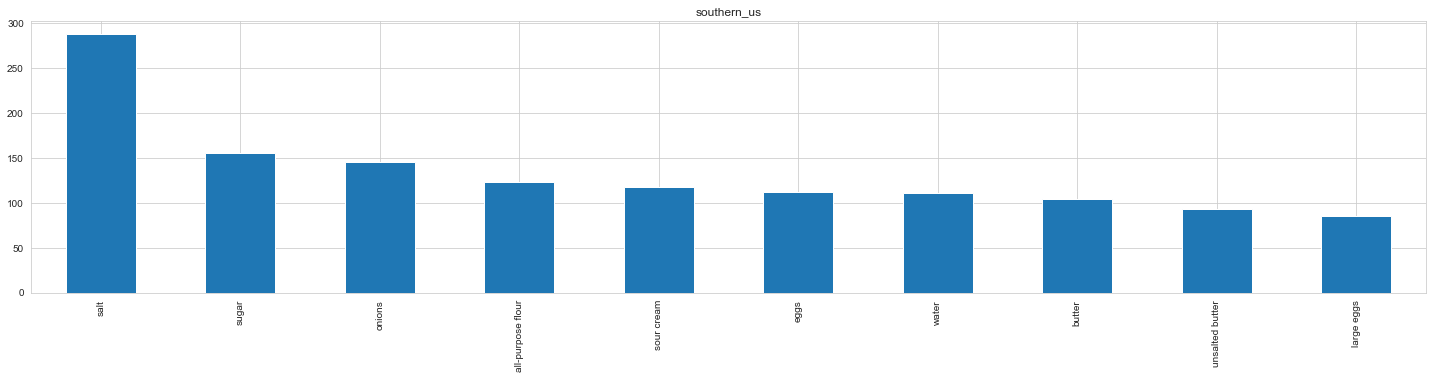

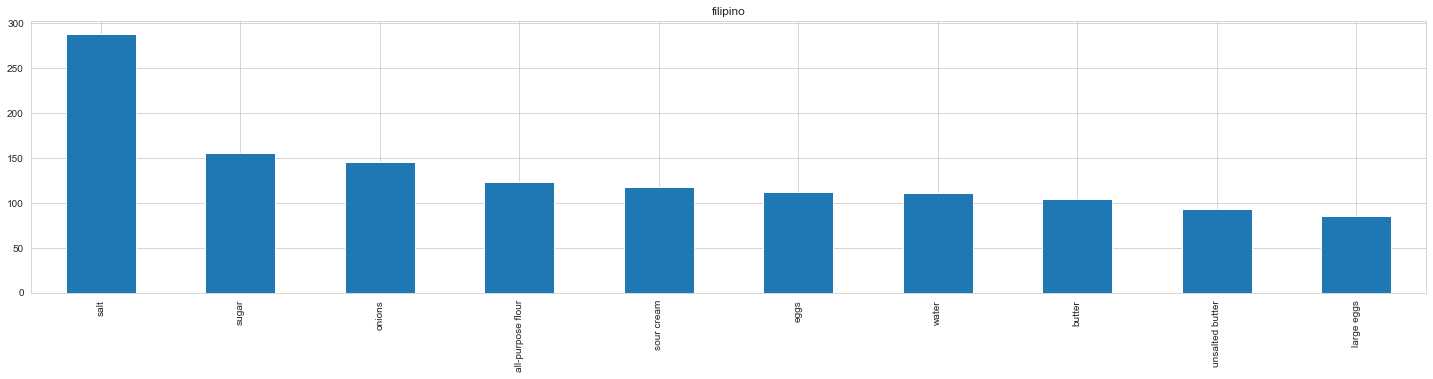

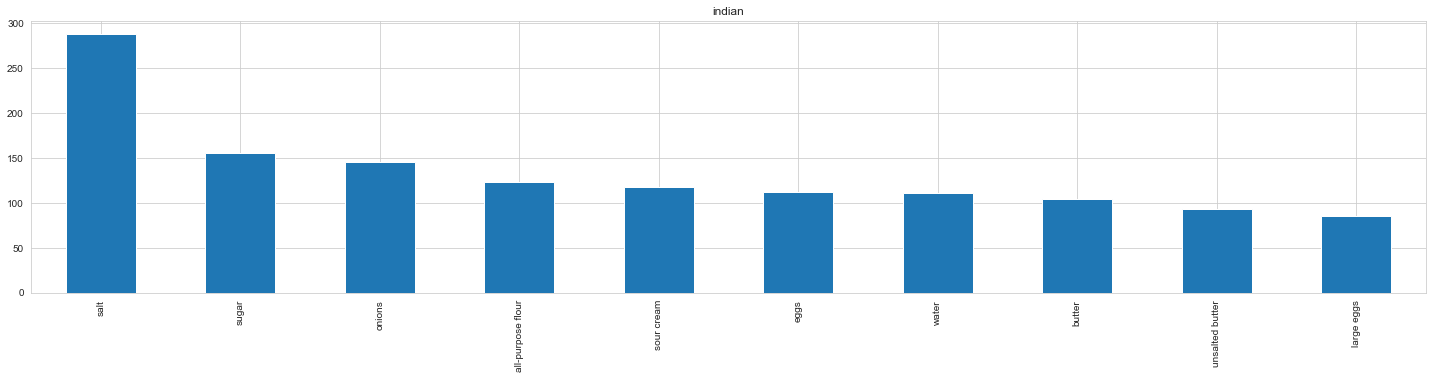

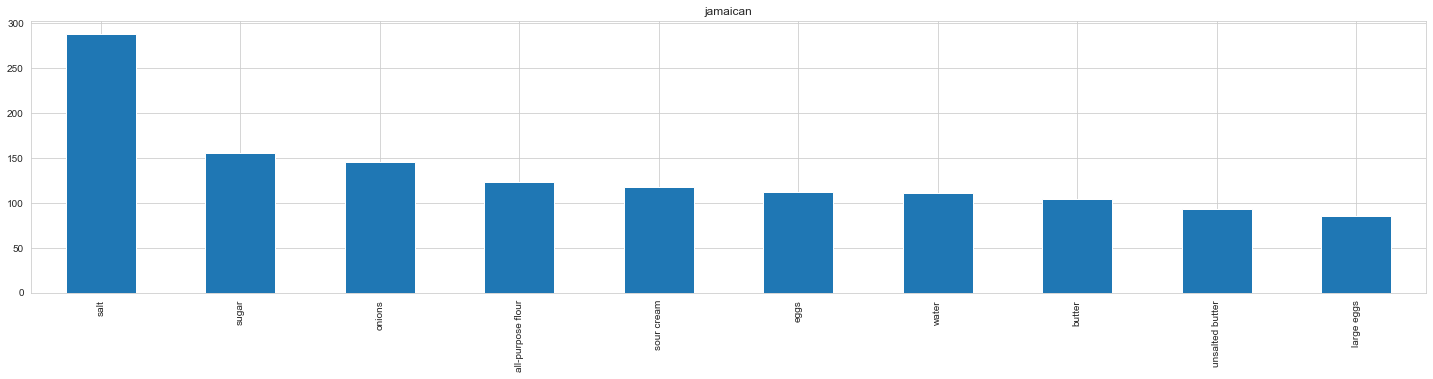

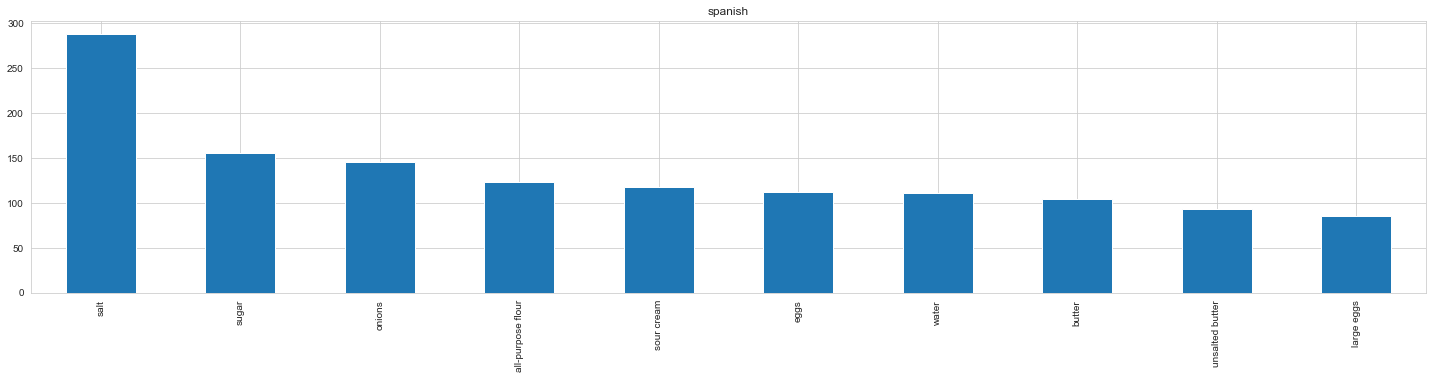

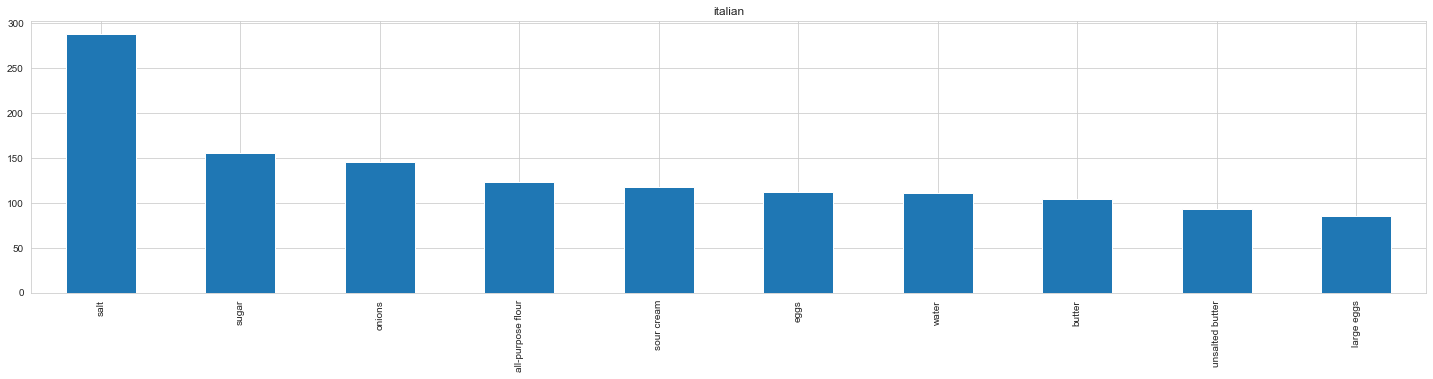

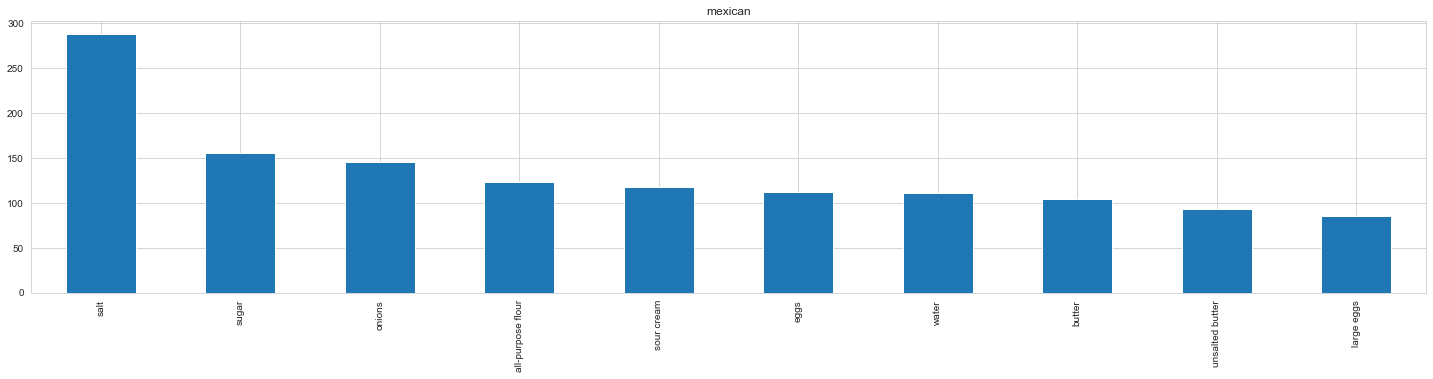

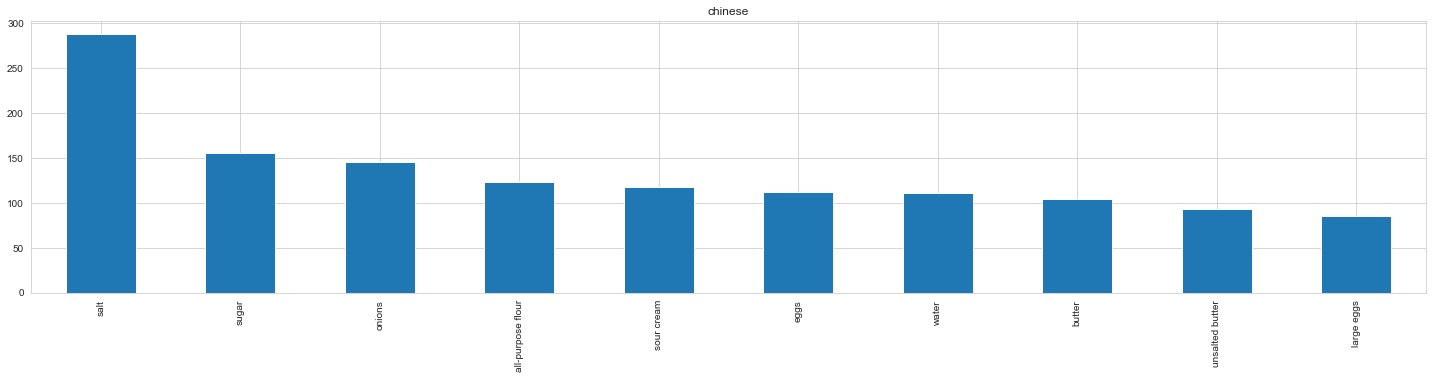

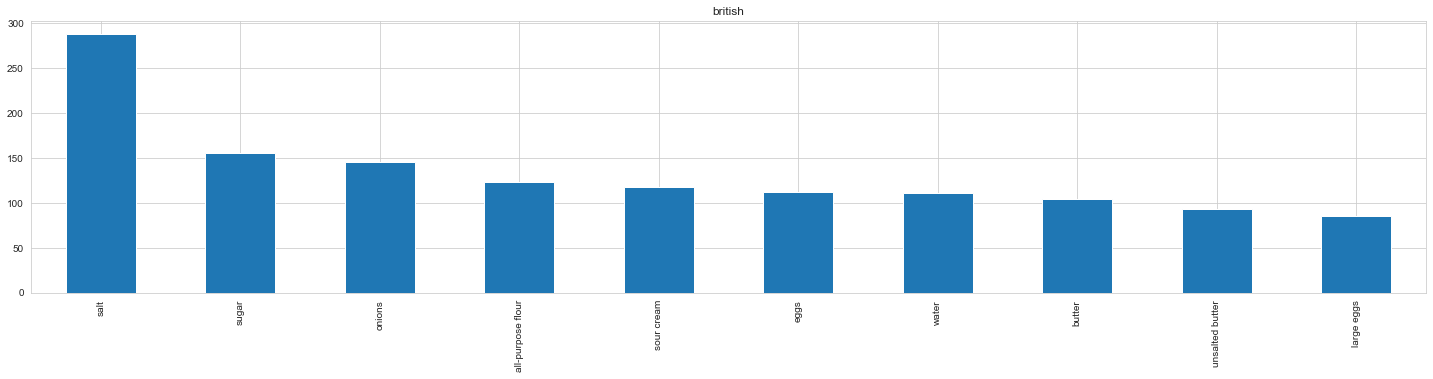

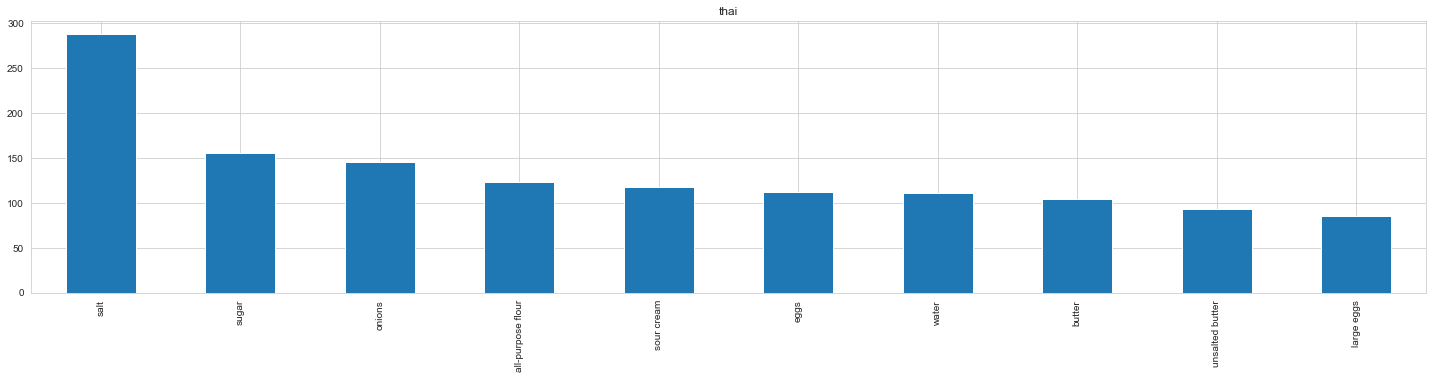

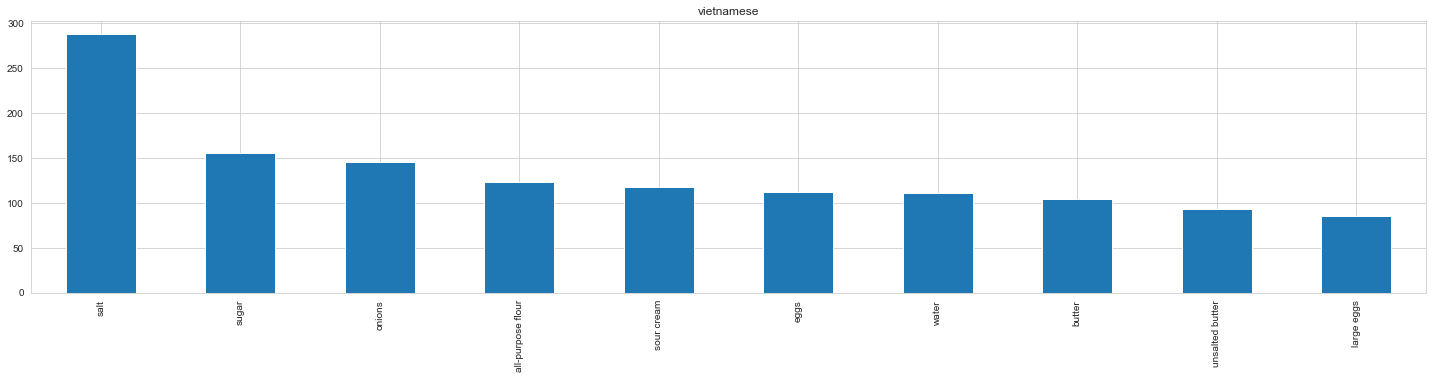

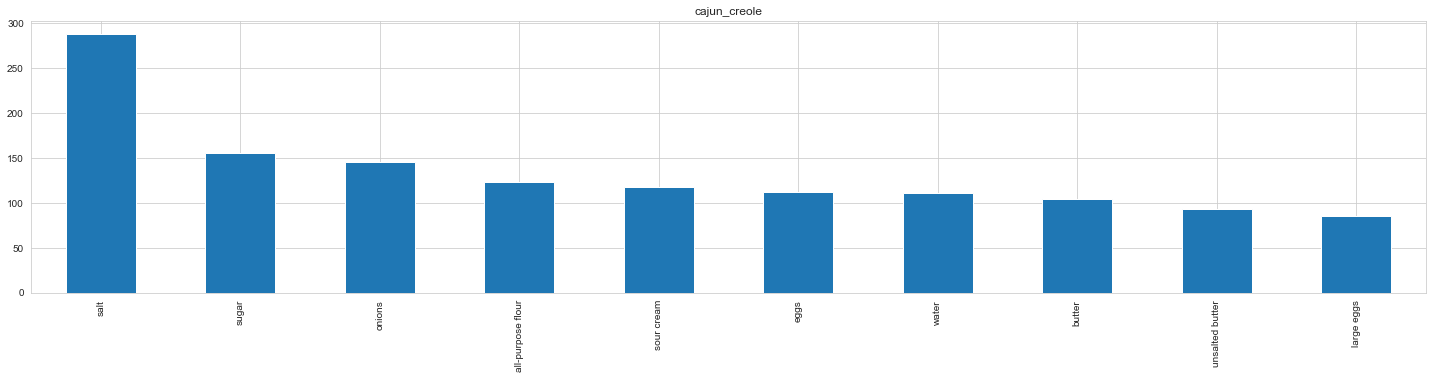

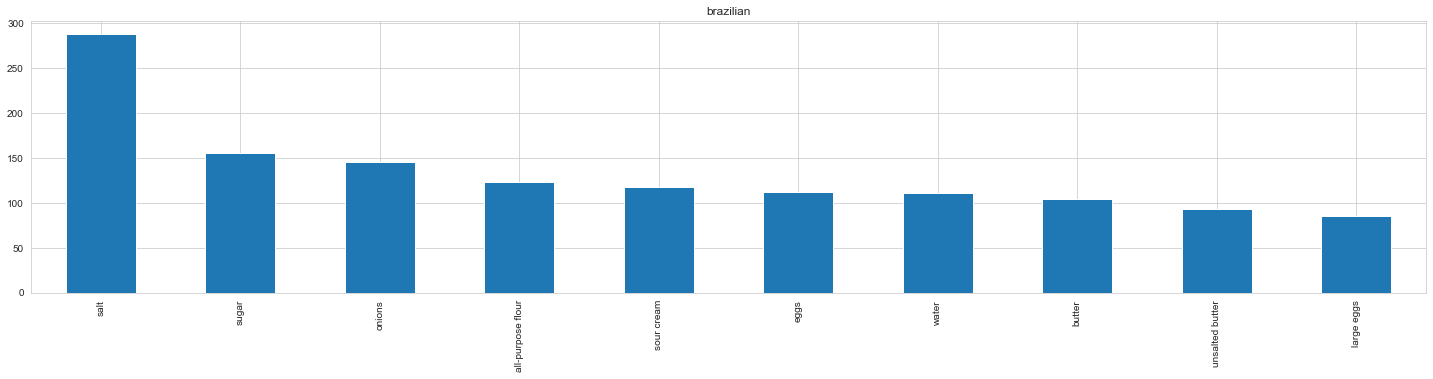

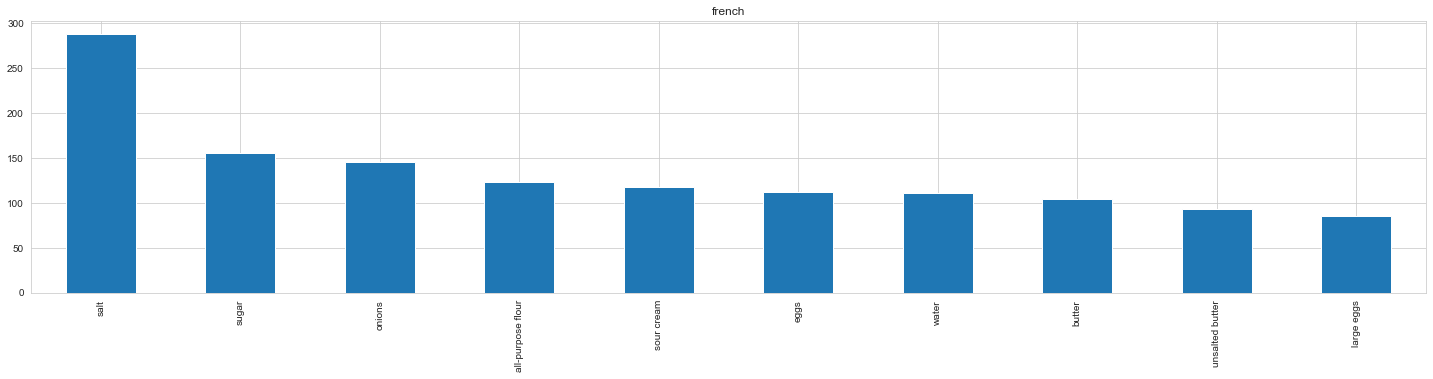

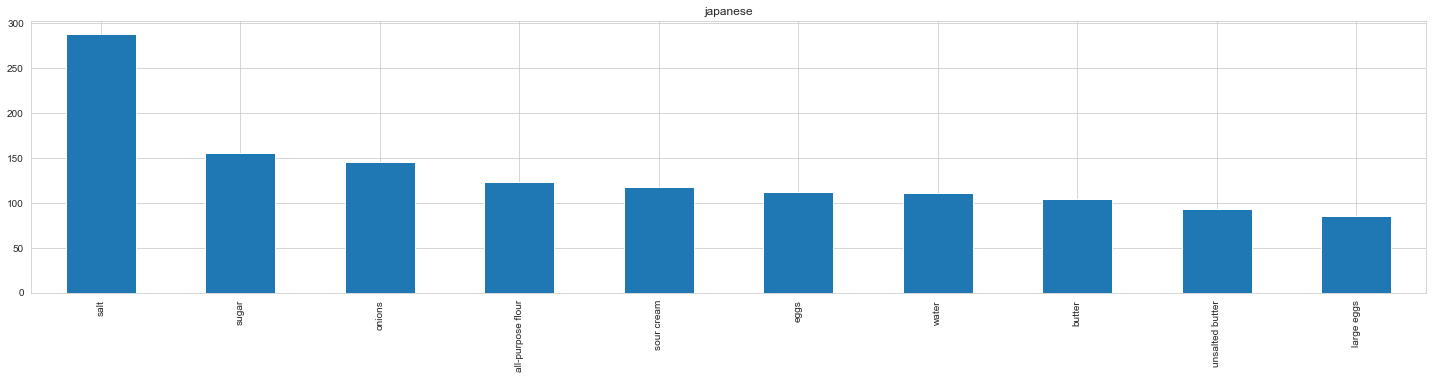

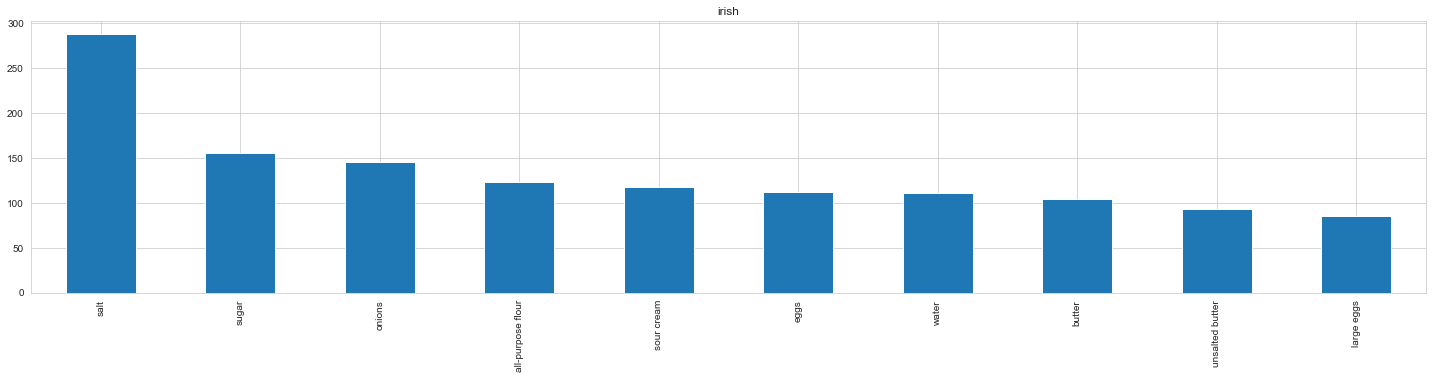

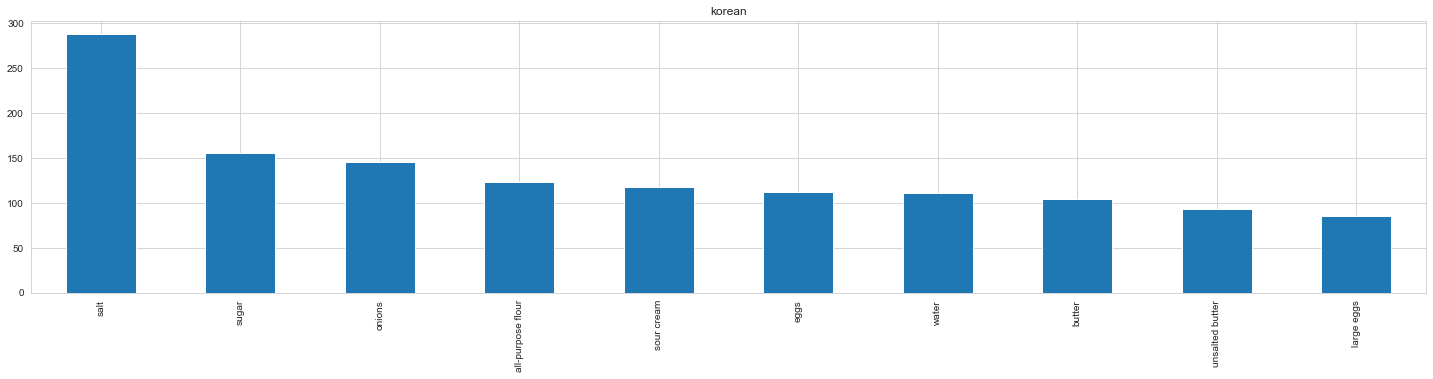

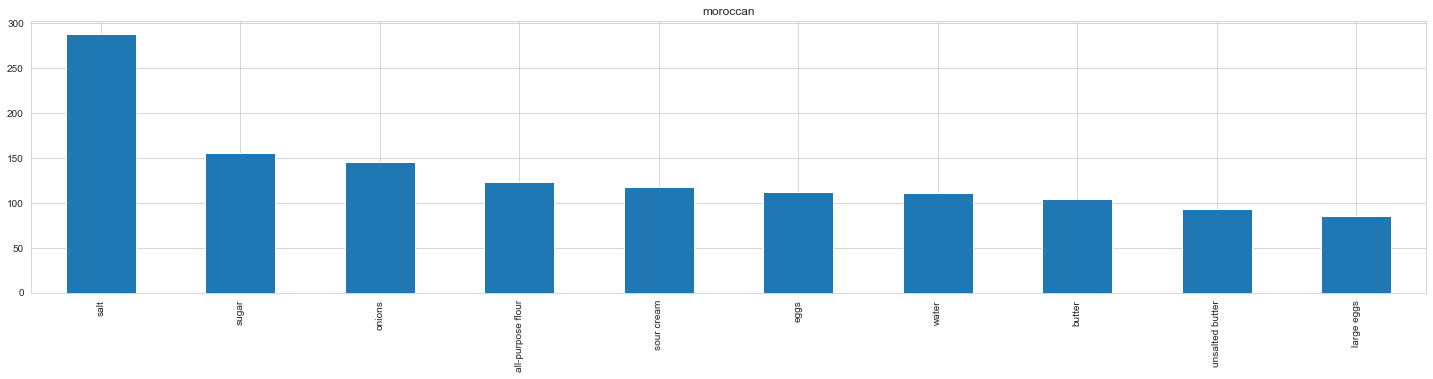

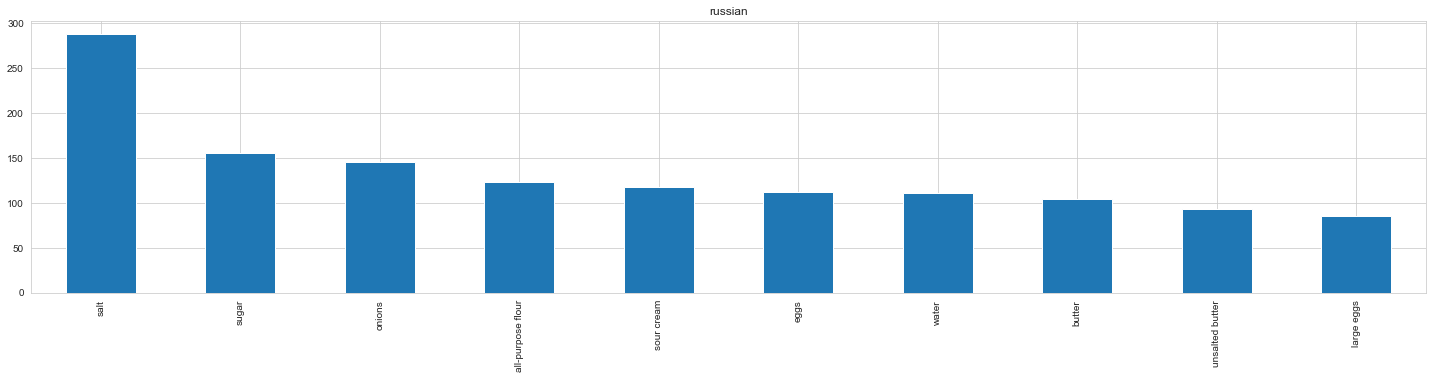

In [155]:
for key in cus.keys():
    fig, ax = plt.subplots(figsize=(25,5))
    pd.Series(cus[key]).value_counts().head(10).plot.bar(ax=ax, title=key)
    plt.show()